In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
uploaded = files.upload()
%matplotlib inline

Saving weatherHistory.csv to weatherHistory.csv


In [0]:
import io
dataframe = pd.read_csv(io.BytesIO(uploaded['weatherHistory.csv']))

In [5]:
# dataframe = pd.read_csv('weatherHistory.csv')
dataframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Collecting the datat that is needed

In [0]:
dataframe = dataframe.loc[:,['Apparent Temperature (C)', 'Humidity']]

In [7]:
dataframe.head()

,Apparent Temperature (C),Humidity
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83


In [0]:
dataframe.rename(columns={'Apparent Temperature (C)':'y','Humidity':'x'}, inplace=True)


In [9]:
dataframe.head()

,y,x
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83


In [10]:
dataframe.isna().sum()

y    0
x    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


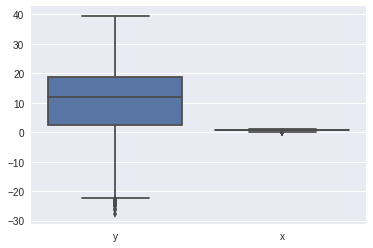

In [11]:
sns.boxplot(data = dataframe)

As the data of y is much larger than x we need to rescale the data

In [0]:
# using min max
def feature_scaling_column(dataframe, column_scaling):
    min_col = dataframe[column_scaling].min()
    max_min_col = dataframe[column_scaling].max()-dataframe[column_scaling].min()
    print('for col= {} min= {} and max-min={} '.format(column_scaling,min_col,max_min_col))
    for counter in range(0, len(dataframe)):
        dataframe.loc[counter, column_scaling] =  ((dataframe.loc[counter, column_scaling] - min_col) / max_min_col)
    print("successfully scaled column ",column_scaling)
    return dataframe

In [13]:
dataframe = feature_scaling_column(dataframe, 'y')

for col= y min= -27.716666666666665 and max-min=67.0611111111111 
successfully scaled column  y


In [14]:
dataframe.y.head()

0    0.523486
1    0.521084
2    0.553144
3    0.501947
4    0.517356
Name: y, dtype: float64

In [15]:
dataframe = feature_scaling_column(dataframe, 'x')

for col= x min= 0.0 and max-min=1.0 
successfully scaled column  x


In [16]:
dataframe.head()

,y,x
0,0.523486,0.89
1,0.521084,0.86
2,0.553144,0.89
3,0.501947,0.83
4,0.517356,0.83


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


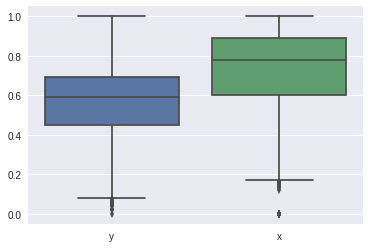

In [17]:
sns.boxplot(data = dataframe)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa739ecafd0>,
      dtype=object)

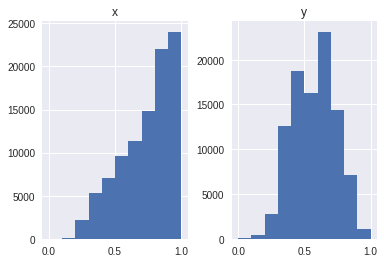

In [18]:
dataframe.hist()

In [19]:
dataframe.describe()

,y,x
count,96453.000000,96453.000000
mean,0.575172,0.734899
std,0.159509,0.195473
min,0.000000,0.000000
25%,0.447767,0.600000
50%,0.592246,0.780000
75%,0.694226,0.890000
max,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


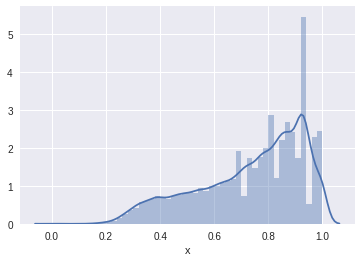

In [20]:
sns.distplot(dataframe.x)

In [21]:

test_data = dataframe.tail(30).reset_index(drop=True)
test_data.head()

,y,x
0,0.816668,0.32
1,0.784691,0.51
2,0.746831,0.58
3,0.726700,0.64
4,0.710463,0.71


In [22]:
dataframe = dataframe.head(len(dataframe)-30)
dataframe.head()

,y,x
0,0.523486,0.89
1,0.521084,0.86
2,0.553144,0.89
3,0.501947,0.83
4,0.517356,0.83


In [0]:
def Linear_Regression():
    cost = np.empty(0)
    # y = wx+b
    learning_rate = 0.0001
    w = 0.01
    b = 0.01
    plt
    df_size = len(dataframe)
    for counter in range(0,100000):
        # creating the predicted output by our supposed values of w and b
        Ypred = pd.Series(np.multiply(w,dataframe.x) + b)
        # loss =  1/2m sum of (y^ - y)**2
        diff_pred = Ypred-dataframe.y
        
        # squaring each term
        loss = (diff_pred)**2
        loss_error_sum = loss.sum()
        loss_error_sum /= (2*df_size)
        # storing the costs so that we can check which is min
        # cost = np.append(cost, loss_error_sum)
        
        # calculate d/d0 of j0,01
        derivate_b = (np.sum(diff_pred))/df_size
        derivate_w = np.sum(np.multiply(dataframe.x, diff_pred))/df_size
        # update w and b in line equation
        w = w - learning_rate*(derivate_w/df_size)
        b = b - learning_rate*(derivate_b/df_size)
        if(counter%100 == 0):
            plt.subplot(3,1,1)
            # plt.plot(counter,loss_error_sum, marker='x', color='r')
            plt.plot(w,loss_error_sum,marker='o',color='r')
            plt.subplot(3,1,2)
            plt.plot(b,loss_error_sum,marker='x',color='g')
            plt.subplot(3,1,3)
            plt.plot(counter,loss_error_sum,marker='x',color='g')
            
        if(loss_error_sum<=0.00009): 
            break
    plt.show()
    print("counter = {} and cost function = {}".format(counter, loss_error_sum))
    return (w, b)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


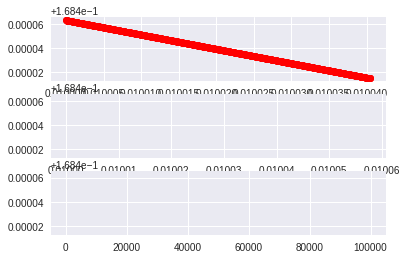

counter = 99999 and cost function = 0.16841503390071647


In [24]:
w,b = Linear_Regression()

In [25]:
print("w is {}, b is {}".format(w, b))

w is 0.010040522799448117, b is 0.010057841577980007


In [0]:
def testing(dataframe):
#   dataframe = pd.read_csv('test.csv')
    Ypred = pd.Series(np.multiply(w,dataframe.x) + b)
#     for counter in range(0, len(dataframe)):
#         Ypred[counter]=(abs(Ypred[counter]-dataframe.y[counter])/dataframe.y[counter])
    error_predicts = np.divide((abs(Ypred-dataframe.y)),dataframe.y)
#         plt.plot(counter,Ypred[counter],marker='+',color='g')
    plt.show()
    error = np.sum(error_predicts)/len(dataframe)
    return (1-error)*100

In [0]:
accuracy = testing(test_data)

In [28]:
accuracy

2.2008518060219973